In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from scipy import linalg

# Operaciones básicas.

In [2]:
abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

In [3]:
A = np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
B=np.matrix([[47,49,-19,257,487],
             [10,-9,63,137,236],
             [79,142,-184,372,536],
             [59,70,-40,332,588]])
C=B@np.linalg.inv(A)

In [4]:
mensaje=''
for i in range(4):
  for j in range(5):
    mensaje+=(abc[int(round(C[i,j],1))-1])

print(mensaje)

ARE YOU HAVING FUN  


# Multipicación de matrices

In [6]:
def Mult(A,B):
  if A.shape[1] != B.shape[0]:
    print('No se puede realizar la multiplicación')
  else:
    C=np.zeros((A.shape[1],B.shape[0]))
    for i in range(A.shape[1]):
      for j in range(B.shape[0]):
        C[i,j]=A[i]@B[:,j]
    return C

#Regresión lineal: 1D

$$y=\Theta^TX=\theta_0+\theta_1x1$$

In [7]:
N = 10
x1 = np.linspace(-1, 1, N)
y = - 3*x1 + 50
df = pd.DataFrame({"Y":y, "X1":x1})
df["ones"] = np.ones(N)
df

,Y,X1,ones
0,53.000000,-1.000000,1.0
1,52.333333,-0.777778,1.0
2,51.666667,-0.555556,1.0
3,51.000000,-0.333333,1.0
4,50.333333,-0.111111,1.0
5,49.666667,0.111111,1.0
6,49.000000,0.333333,1.0
7,48.333333,0.555556,1.0
8,47.666667,0.777778,1.0
9,47.000000,1.000000,1.0


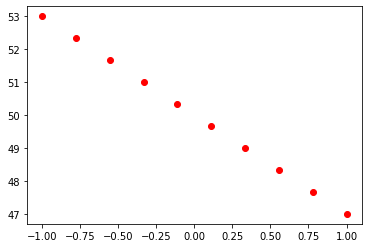

In [8]:
plt.plot(df.X1,df.Y,"ro")

$$\Theta=(X^TX)^{-1}X^Ty$$

In [9]:
X1 = np.matrix(df[ ["ones","X1"] ])
y = np.array([df["Y"]])
Y  = np.matrix(np.transpose(y))
X1t=X1.T
x1=np.linalg.inv(X1t@X1)
(x1@X1.T)@Y

matrix([[50.],
        [-3.]])

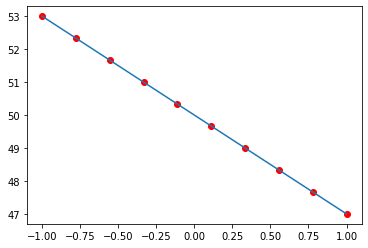

In [10]:
plt.plot(df.X1,df.Y,"ro")
plt.plot(df.X1,-3*df.X1+50,"-")

#Regresión lineal: 2D

$$\Theta=(X^TX)^{-1}X^Ty$$

Text(0.5, 0, 'Y1')

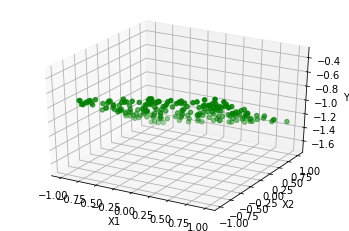

In [16]:
N = 200
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-1, 1, N)
X1, X2 = np.meshgrid(x1,x2)
Y = 0.2*x1 - 0.5*x2 - 1.0
# Ecuaciones parametricas del mismo plano:
alpha = 2*np.random.random(N)-1
beta  = 2*np.random.random(N)-1
x1 = alpha
x2 = beta
y = 0.2*alpha - 0.5*beta - 1.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="green")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

In [30]:
# Regresion bi-lineal
df = pd.DataFrame({"Y":y[:,0], "X1":x1,"X2":x2})
df["ones"] = np.ones(N)

y = np.reshape(df.Y.values, (N,1))
X = df[["ones","X1","X2"]].values
X = np.matrix(X)

Xi=X.T@X
(np.linalg.inv(Xi)@X.T)@Y

matrix([[-9.99738453e-01,  2.45509983e-02,  1.41634772e-04]])

#Autovalores y autovectores

\begin{eqnarray}
x' = 2x -y + z \\
y' = 3y - z \\
z' = 2x + y + 3z
\end{eqnarray}

##a)

In [11]:
A=np.matrix([[2,-1,1],
             [0,3,-1],
             [2,1,3]])

V,diag,Udagger=linalg.svd(A)
U=Udagger.transpose().conjugate()
A_diag=np.diag(diag)
A_diag

array([[4.21043379, 0.        , 0.        ],
       [0.        , 3.30967409, 0.        ],
       [0.        , 0.        , 1.14817454]])

## b)
Si $\textbf{r}=e^{At}\textbf{r}(0)$ , con $\textbf{r}(0)=(1,1,2)$

In [12]:
def x(x0,A,t):
  return x0*np.exp(A*t)

def y(y0,A,t):
  return y0*np.exp(A*t)

def z(z0,A,t):
  return z0*np.exp(A*t)

x0 = y0 =1 ; z0 = 2
A0 = diag[0]
A1 = diag[1]
A2 = diag[2]

$\textbf{r}$ en t = 2

In [13]:
t=2
x(x0,A0,t),y(y0,A1,t),z(z0,A2,t)

(4540.8412662897645, 749.4564213678818, 19.875667659258248)

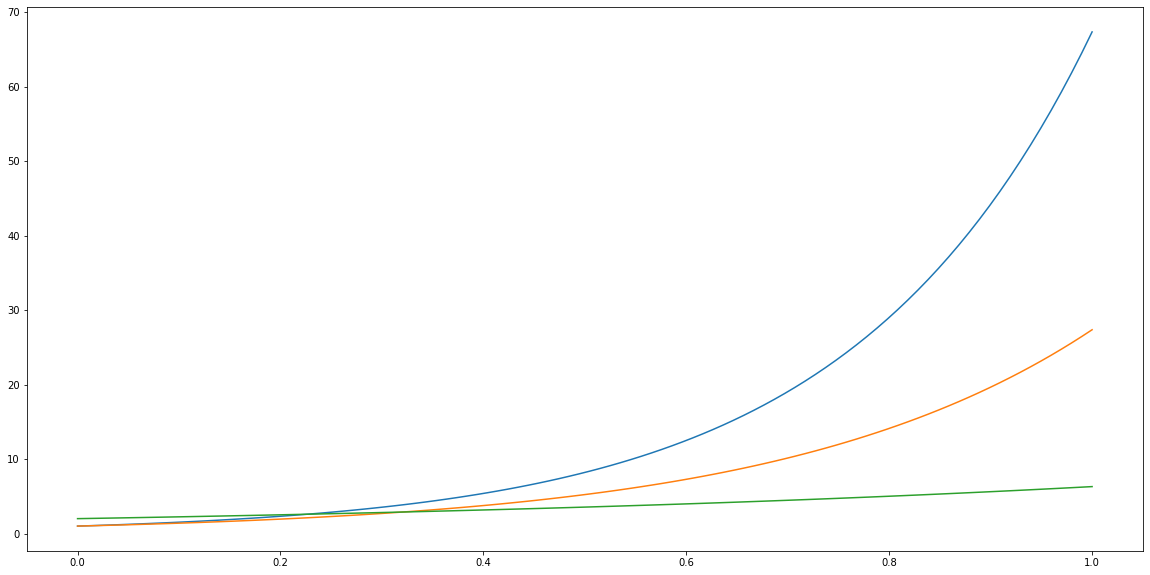

In [14]:
ti=np.linspace(0,1,100)

plt.figure(figsize=(20,10))
plt.plot(ti,x(x0,A0,ti))
plt.plot(ti,y(y0,A1,ti))
plt.plot(ti,z(z0,A2,ti))
plt.show()

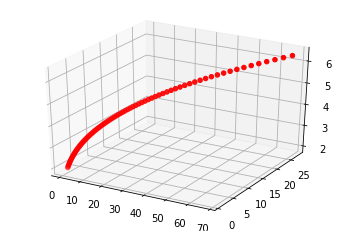

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x(x0,A0,ti),y(y0,A1,ti),z(z0,A2,ti),color='red')